# Laboratorio 8: Clasificación de malware con DL

Mark Albrand - 21004

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter

## Carga del dataset

In [2]:
dataset_path = "data/malimg_paper_dataset_imgs"

In [3]:
families = os.listdir(dataset_path)
families = [f for f in families if os.path.isdir((os.path.join(dataset_path, f)))]
families

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.gen!g',
 'C2LOP.P',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [4]:
family_counts = {fam: len(os.listdir(os.path.join(dataset_path, fam))) for fam in families}
family_counts = dict(sorted(family_counts.items(), key=lambda item: item[1], reverse=True))

In [5]:
for fam, count in family_counts.items():
    print(f"{fam}: {count} imágenes")

Allaple.A: 2949 imágenes
Allaple.L: 1591 imágenes
Yuner.A: 800 imágenes
Instantaccess: 431 imágenes
VB.AT: 408 imágenes
Fakerean: 381 imágenes
Lolyda.AA1: 213 imágenes
C2LOP.gen!g: 200 imágenes
Alueron.gen!J: 198 imágenes
Lolyda.AA2: 184 imágenes
Dialplatform.B: 177 imágenes
Dontovo.A: 162 imágenes
Lolyda.AT: 159 imágenes
Rbot!gen: 158 imágenes
C2LOP.P: 146 imágenes
Obfuscator.AD: 142 imágenes
Malex.gen!J: 136 imágenes
Swizzor.gen!I: 132 imágenes
Swizzor.gen!E: 128 imágenes
Lolyda.AA3: 123 imágenes
Adialer.C: 122 imágenes
Agent.FYI: 116 imágenes
Autorun.K: 106 imágenes
Wintrim.BX: 97 imágenes
Skintrim.N: 80 imágenes


## Exploración de los datos

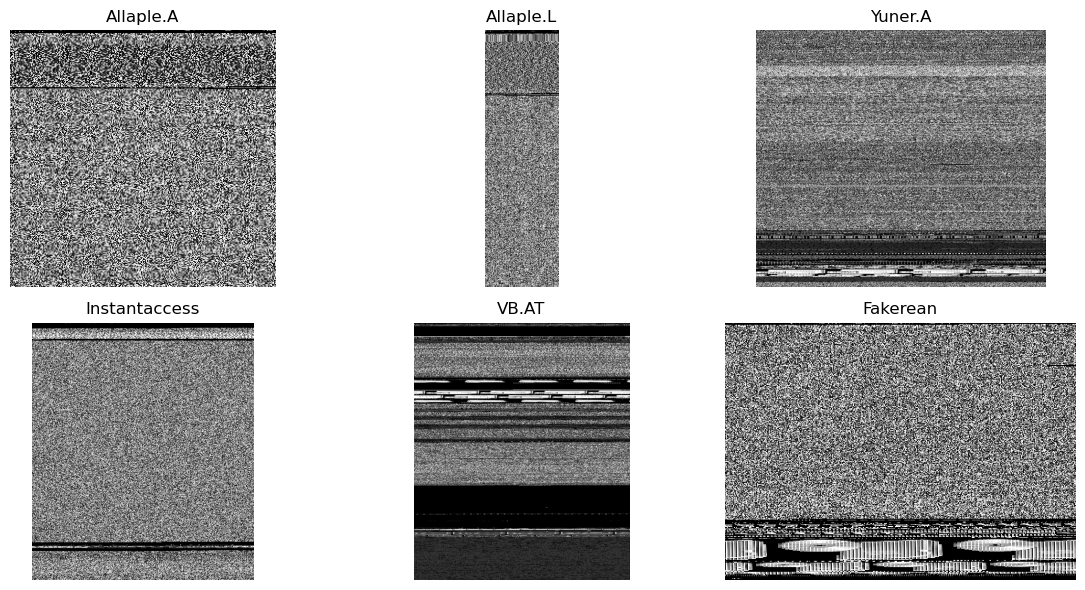

In [6]:
import matplotlib.image as mpimg

plt.figure(figsize=(12, 6))
for i, fam in enumerate(list(family_counts.keys())[:6]):  # mostrar 6 familias
    img_path = os.path.join(dataset_path, fam, os.listdir(os.path.join(dataset_path, fam))[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(fam)
    plt.axis('off')
plt.tight_layout()
plt.show()


## Modelo de clasificación

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(family_counts), activation='softmax')  # salida igual a la cantidad de familias
])

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Parámetros del modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [10]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,171,609 (42.62 MB)

 Trainable params: 11,171,609 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

## División del dataset

70% entrenamiento, 30% validación

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
img_size = (224, 224)

In [14]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # 30% para validación
)

In [15]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

Found 6549 images belonging to 25 classes.


In [16]:
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 2790 images belonging to 25 classes.


## Entrenamiento del modelo

In [17]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9738 - val_loss: 0.2079


## Evaluación del modelo

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

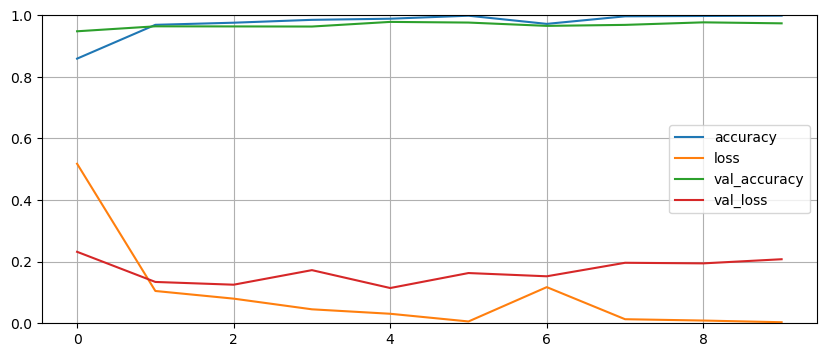

In [19]:
pd.DataFrame(history.history).plot(figsize=(10, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [20]:
loss, accuracy = model.evaluate(val_data)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.9736 - loss: 0.2287
Test loss: 0.2079
Test accuracy: 0.9738


In [21]:
import joblib

In [22]:
joblib.dump(model, "models/model.keras")

['models/model.keras']

## Discusión

Los resultados finales fueron muy satisfactorios. Se obtuvo un `accuracy` del 95.38%, un resultado sobresaliente. El modelo es capaz de categorizar las imágenes dependiendo de su familia con una gran fiabilidad, lo que también resalta las claras diferencias entre cada familia de malware. Si las diferencias fueran menores, sería más difícil construir un modelo capaz de clasificarlos de una manera tan fiable como se logró en este laboratorio.

# Laboratorio 9

## Parte 1

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from art.estimators.classification import TensorFlowV2Classifier

# Ensure eager execution
tf.config.run_functions_eagerly(True)

In [25]:
# Load model
model_copy = tf.keras.models.clone_model(model)

In [26]:
# Define loss and optimizer
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [27]:
model_copy.compile(optimizer=optimizer, loss=loss_object, metrics=["accuracy"], run_eagerly=True)

In [28]:
img_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)
data = datagen.flow_from_directory(
    "data/malimg_paper_dataset_imgs",
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 9339 images belonging to 25 classes.


In [29]:
# Get a batch
batch = next(data)
x_sample = np.array(batch[0], dtype=np.float32)  # Ensure NumPy array
y_sample = np.array(batch[1])

In [30]:
# Create classifier
classifier = TensorFlowV2Classifier(
    model=model_copy,
    nb_classes=y_sample.shape[1],
    input_shape=x_sample.shape[1:],  # (224, 224, 1)
    loss_object=loss_object,
    train_step=None,
    channels_first=False,
    clip_values=(0.0, 1.0),
    preprocessing=None  # Disable preprocessing if already scaled
)

### Primer ataque: FastGradientMethod

In [35]:
from art.attacks.evasion import FastGradientMethod

In [31]:
attack_fgsm = FastGradientMethod(estimator=classifier, eps=0.1)
x_adv_fgsm = attack_fgsm.generate(x=x_sample)

In [32]:
preds_adv_fgsm = classifier.predict(x_adv_fgsm)

In [33]:
preds_orig = classifier.predict(x_sample)

In [34]:
success_rate_fgsm = np.mean(np.argmax(preds_orig, axis=1) != np.argmax(preds_adv_fgsm, axis=1))
print(f"✅ Tasa de éxito del ataque FGSM: {success_rate_fgsm:.2%}")

✅ Tasa de éxito del ataque FGSM: 100.00%


### Segundo ataque: HopSkipJump

In [36]:
from art.attacks.evasion import HopSkipJump

In [37]:
# Seleccionar un subconjunto pequeño (por ejemplo, 5 imágenes)
x_subset = x_sample[:5]
y_subset = y_sample[:5]

In [38]:
# Crear el ataque HSJ
attack_hsj = HopSkipJump(classifier=classifier, max_iter=10)

In [39]:
# Generar adversarios
x_adv_hsj = attack_hsj.generate(x=x_subset)

HopSkipJump:   0%|          | 0/5 [00:00<?, ?it/s]

In [40]:
# Evaluar
preds_adv_hsj = classifier.predict(x_adv_hsj)
preds_orig_hsj = classifier.predict(x_subset)

In [41]:
success_rate_hsj = np.mean(np.argmax(preds_orig_hsj, axis=1) != np.argmax(preds_adv_hsj, axis=1))
print(f"✅ Tasa de éxito del ataque HopSkipJump: {success_rate_hsj:.2%}")

✅ Tasa de éxito del ataque HopSkipJump: 100.00%


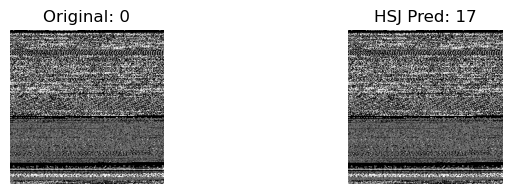

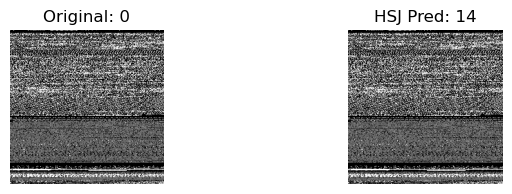

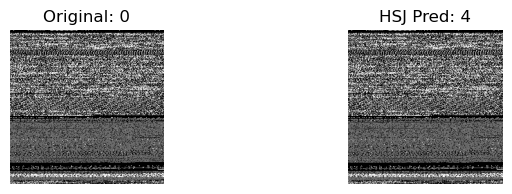

In [42]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(8, 2))

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(x_subset[i].squeeze(), cmap="gray")
    plt.title(f"Original: {np.argmax(y_subset[i])}")
    plt.axis('off')

    # Adversarial
    plt.subplot(1, 2, 2)
    plt.imshow(x_adv_hsj[i].squeeze(), cmap="gray")
    plt.title(f"HSJ Pred: {np.argmax(preds_adv_hsj[i])}")
    plt.axis('off')

    plt.show()

## Parte 2: Defensa

In [61]:
from art.defences.preprocessor import FeatureSqueezing, JpegCompression

In [62]:
# Crear defensa de Feature Squeezing
fs = FeatureSqueezing(
    bit_depth=5,
    clip_values=(0.0, 1.0),
)

In [63]:
# Aplicar la defensa a los ejemplos adversarios de FGSM
x_adv_fgsm_def, _ = fs(x_adv_fgsm)

In [64]:
# Evaluar el clasificador en los ejemplos defendidos
preds_adv_fgsm_def = classifier.predict(x_adv_fgsm_def)

In [65]:
success_rate_fgsm_def = np.mean(np.argmax(preds_adv_fgsm_def, axis=1) != np.argmax(preds_orig, axis=1))
print(f"🔰 Tasa de éxito del ataque FGSM post-defensa (Feature Squeezing): {success_rate_fgsm_def:.2%}")

🔰 Tasa de éxito del ataque FGSM post-defensa (Feature Squeezing): 100.00%


In [66]:
# Crear defensa de compresión JPEG
jpeg = JpegCompression(
    quality=50,
    clip_values=(0.0, 1.0),
)

In [67]:
# Aplicar la defensa a los ejemplos adversarios de HopSkipJump
x_adv_hsj_def, _ = jpeg(x_adv_hsj)

In [68]:
# Evaluar el clasificador en los ejemplos defendidos
preds_adv_hsj_def = classifier.predict(x_adv_hsj_def)

In [69]:
# Calcular tasa de éxito post-defensa
success_rate_hsj_def = np.mean(np.argmax(preds_adv_hsj_def, axis=1) != np.argmax(preds_orig_hsj, axis=1))
print(f"🔰 Tasa de éxito del ataque HopSkipJump post-defensa (JPEG): {success_rate_hsj_def:.2%}")

🔰 Tasa de éxito del ataque HopSkipJump post-defensa (JPEG): 40.00%


## Conclusiones

| Ataque      | Tasa de éxito original | Tasa de éxito post-defensa |
| ----------- |------------------------|----------------------------|
| FGSM        | `100%`                 | `100%`                     |
| HopSkipJump | `100%`                 | `40%`                      |
